 LINK TO DATASET: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read and define the dataset from a csv file into a dataframe
dataset = pd.read_csv('predictive_maintenance.csv')

# Define a mapping dictionary for encoding
type_map = {'L': 0, 'M': 1, 'H': 2}
# Encode the "Type" column using the mapping dictionary
dataset['Type'] = dataset['Type'].map(type_map)

# Define the features and targets
X = dataset.iloc[:, 2:8].values     # FEATURES
y_binary = dataset.iloc[:, 8].values    # BINARY TARGETS OF COLUMN 9

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y_binary, test_size=0.2, random_state=42)

In [4]:
# Create a perceptron model for the binary target
perceptron_model_binary = Perceptron(random_state=42)

# Train the perceptron model on the training data using the binary targets
perceptron_model_binary.fit(X_train, y_train_binary)

Perceptron(random_state=42)

In [5]:
# Make predictions on the training and testing data for binary targets
y_train_binary_pred = perceptron_model_binary.predict(X_train)
y_test_binary_pred = perceptron_model_binary.predict(X_test)

In [6]:
# Calculate the evaluation metrics of the model on the training and testing data using binary targets
train_accuracy_binary = accuracy_score(y_train_binary, y_train_binary_pred)
test_accuracy_binary = accuracy_score(y_test_binary, y_test_binary_pred)
train_precision_binary = precision_score(y_train_binary, y_train_binary_pred, zero_division=0)
test_precision_binary = precision_score(y_test_binary, y_test_binary_pred, zero_division=0)
train_recall_binary = recall_score(y_train_binary, y_train_binary_pred, zero_division=0)
test_recall_binary = recall_score(y_test_binary, y_test_binary_pred, zero_division=0)
train_f1_binary = f1_score(y_train_binary, y_train_binary_pred)
test_f1_binary = f1_score(y_test_binary, y_test_binary_pred)

In [7]:
# Print the accuracy, precision and recall
print("Binary Target - Training Accuracy:", train_accuracy_binary)
print("Binary Target - Testing Accuracy:", test_accuracy_binary)
print("Binary Target - Training Precision:", train_precision_binary)
print("Binary Target - Testing Precision:", test_precision_binary)
print("Binary Target - Training Recall:", train_recall_binary)
print("Binary Target - Testing Recall:", test_recall_binary)
print("Binary Target - Training F1 Score:", train_f1_binary)
print("Binary Target - Testing F1 Score:", test_f1_binary, "\n")

Binary Target - Training Accuracy: 0.969
Binary Target - Testing Accuracy: 0.9735
Binary Target - Training Precision: 0.6102941176470589
Binary Target - Testing Precision: 0.6111111111111112
Binary Target - Training Recall: 0.29856115107913667
Binary Target - Testing Recall: 0.36065573770491804
Binary Target - Training F1 Score: 0.40096618357487923
Binary Target - Testing F1 Score: 0.4536082474226804 



In [8]:
# Calculate the accuracy of only failure samples for the binary target
test_accuracy_failure_binary = 0

# Filter failure samples from the test set for the binary target
X_failure_binary_test = X_test[y_test_binary == 1]
y_failure_binary_test = y_test_binary[y_test_binary == 1]

In [9]:
if len(X_failure_binary_test) > 0:
    # Make predictions on failure samples for the binary target
    y_failure_binary_test_pred = perceptron_model_binary.predict(X_failure_binary_test)
    
    # Calculate the test accuracy for the binary target
    test_accuracy_failure_binary = accuracy_score(y_failure_binary_test, y_failure_binary_test_pred)

print("Binary Classification Test Accuracy on Failure Samples:", test_accuracy_failure_binary)

Binary Classification Test Accuracy on Failure Samples: 0.36065573770491804


AUC-PR: 0.4195905023243425


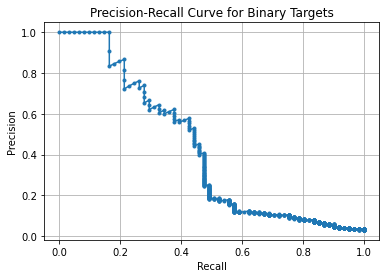

In [10]:
# Compute decision function scores for binary targets
y_binary_scores = perceptron_model_binary.decision_function(X_test)

# Compute precision-recall pairs for different threshold values
precision, recall, _ = precision_recall_curve(y_test_binary, y_binary_scores)

# Quantify the Area Under the Curve to help measure performance
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Perceptron')
plt.grid(True)
plt.show()